<a href="https://colab.research.google.com/github/Abhilashg11/Data_science/blob/master/ANN_Neuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from scikeras.wrappers import kerasClassifier

ModuleNotFoundError: ignored

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [8]:
x_train/=255
x_test/=255

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
epochs =4
batch_size = 140
##check
no_classes = 10

In [11]:
## building the model

In [12]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(no_classes,activation='softmax'))
model.summary()
##check dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               153900    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 558830 (2.13 MB)
Trainable params: 558830 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
##compile the model

In [14]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

In [15]:
##fit the model

In [16]:
history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(x_test,y_test))

Epoch 1/4
429/429 [==============================] - 11s 23ms/step - loss: 0.2718 - accuracy: 0.9159 - val_loss: 0.1109 - val_accuracy: 0.9653
Epoch 2/4
429/429 [==============================] - 7s 17ms/step - loss: 0.1102 - accuracy: 0.9660 - val_loss: 0.0915 - val_accuracy: 0.9722
Epoch 3/4
429/429 [==============================] - 10s 24ms/step - loss: 0.0773 - accuracy: 0.9757 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 4/4
429/429 [==============================] - 16s 36ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0678 - val_accuracy: 0.9796


In [17]:
##check loss,acc,...

In [18]:
score=model.evaluate(x_test,y_test)
print('the loss=',score[0])
print('the accuracy=',score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.9796
the loss= 0.06781404465436935
the accuracy= 0.9796000123023987


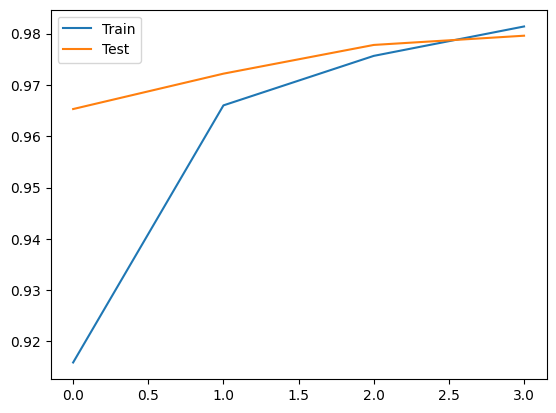

In [24]:
plt.plot(range(4),history.history['accuracy'],label='Train')
plt.plot(range(4),history.history['val_accuracy'],label='Test')
plt.legend()